In [1]:
import sys; sys.path.insert(0, "..")
from src.NLM import NLM
from src.utils import generate_data

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic Data

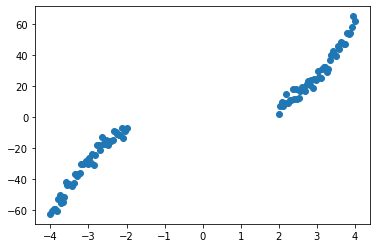

In [3]:
x, y, x_test = generate_data(number_of_points=50, noise_variance=9)

plt.scatter(x, y)
plt.show()

### Run NLM

In [4]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

width = [50,20] # using the architecture used in the paper
hidden_layers = len(width)
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = NLM(architecture, random=random)
print('Number of parameters =',nn.D)

###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
reg_param = 0.
# reg_param = 10.
nn.fit(x.reshape((1, -1)), y.reshape((1, -1)), params, reg_param = reg_param)

Number of parameters = 1141
Iteration 0 lower bound 2229.4114157020226; gradient mag: 5397.387564988611
Iteration 100 lower bound 133.90238795257613; gradient mag: 681.9179437460656
Iteration 200 lower bound 83.94437120563012; gradient mag: 72.39460223013948
Iteration 300 lower bound 76.62903457401985; gradient mag: 45.30279752703929
Iteration 400 lower bound 68.27558995976867; gradient mag: 44.555636723094786
Iteration 500 lower bound 53.64273510920616; gradient mag: 39.256929636422676
Iteration 600 lower bound 46.949049779157505; gradient mag: 30.51403166086242
Iteration 700 lower bound 41.93643470138622; gradient mag: 28.484426463131552
Iteration 800 lower bound 37.726274684574086; gradient mag: 27.341696013181178
Iteration 900 lower bound 34.05359209092734; gradient mag: 26.41212700546896
Iteration 1000 lower bound 30.79215319297105; gradient mag: 25.537716774920558
Iteration 1100 lower bound 27.808568663767282; gradient mag: 24.94247872518976
Iteration 1200 lower bound 24.93730835

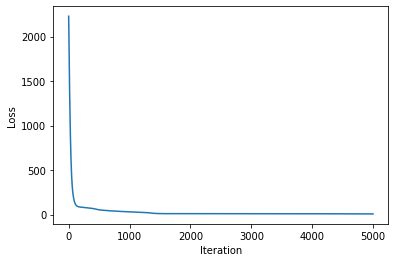

In [5]:
plt.plot(nn.objective_trace)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Examine MAP Model

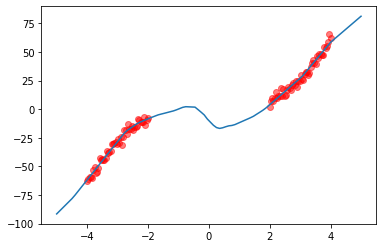

In [6]:
y_pred = nn.forward(nn.weights, x_test.reshape(1,-1))
plt.scatter(x,y,color = 'r',alpha = 0.5)
plt.plot(x_test, y_pred.flatten())
plt.show()

### Examine Prior Samples

In [7]:
## WE SHOULD CONFIRM WHAT EXACT VALUES OF PRIOR VAR AND NOISE VAR THEY USED. THIS SEEMED TO AFFECT THE RESULTS A LOT
prior_var = 5**2
noise_var = 3
y_prior = nn.get_prior_samples(x_test, prior_var = prior_var, noise_var = noise_var)

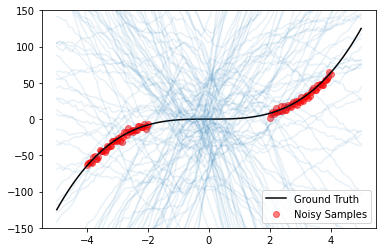

In [8]:
plt.scatter(x,y, color='red', alpha = 0.5, label='Noisy Samples')
plt.plot(x_test, x_test**3, color='black', label="Ground Truth")
plt.plot(x_test, y_prior, color='tab:blue', alpha=0.1)
plt.ylim([-150, 150])
plt.legend()
plt.show()

### Examine Posterior Samples

In [9]:
joint_mean, joint_variance, posterior, predictive = nn.perform_bayesian(x, y, x_test, prior_var = prior_var, noise_var = noise_var)

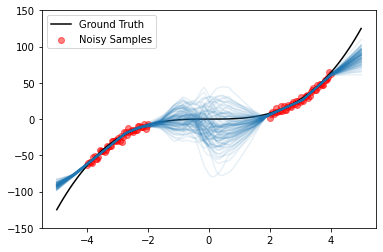

In [10]:
plt.scatter(x,y, color='red', alpha = 0.5, label='Noisy Samples')
plt.plot(x_test, x_test**3, color='black', label="Ground Truth")
plt.plot(x_test, posterior.T, color='tab:blue', alpha=0.1)
plt.ylim([-150, 150])
plt.legend()
plt.show()

In [11]:
# Calulating percentiles
pp_upper = np.percentile(predictive, 97.5, axis=0)
pp_lower = np.percentile(predictive, 2.5, axis=0)
pp_mean = np.mean(predictive, axis=0)

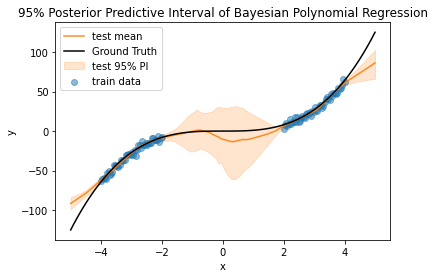

In [12]:
# Visualizing 95% posterior predictive interval of Bayesian polynomial regression
plt.fill_between(x_test, pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
plt.plot(x_test, pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
plt.plot(x_test, x_test**3, color='black', label="Ground Truth")
plt.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.title("95% Posterior Predictive Interval of Bayesian Polynomial Regression")
plt.show()

### Questions for Professor Pan and Cooper

* Is it okay to assumea prior mean of 0?
* What was the prior variance assumed in the paper?
* How is MAP as defined here any different than MLE? We are not putting any restrictions (any priors0 on the weights when calling `.fit`.